# Three-Body Interaction in Young and Nuclear Star Clusters

## INTRODUCTION

### *Young Star Cluster ( YSC ) & Nuclear Star Cluster ( NSC )*

A **star cluster** is a group of stars that share a common origin and are gravitationally bound for some length of time. Studying star clusters is important, as they give us important information about stellar evolutions.

In particular here we will focus on ***Young*** and ***Nuclear star clusters***.


<br>
<br>


**Young (open) clusters** are usually found within the spiral arms (of the galaxy), and are generally young objects (although some exceptions might exist, like the one of M67 which is an old one).

**YSC's** *main features* are:

$$ \text{Short lived:} \qquad age \leq 0.1 \,Gyr $$
$$ \text{Less massive:}  \qquad M_{cl}    \geq 10^4\text{ }M_{\odot} $$
$$ \text{Less dense:} \qquad  \rho_{core}   \geq 10^4\text{ } M_{\odot}pc^{-3}$$
$$ \text{Less fast:} \qquad  v_{esc}   \sim 10 \, km\text{ }s^{-1}$$

<br>
<br>

Instead, **Globular clusters** consist of old stars (probably just a few hundred million years younger than the universe itself) and they are verysimilar to Nuclear clusters

**NSC's** *main features* are:

$$ \text{Long lived:} \qquad age \leq 10 \, Gyr $$
$$ \text{More massive:}  \qquad M_{cl}    \geq 10^6\text{ }M_{\odot} $$
$$ \text{More dense:} \qquad  \rho_{core}   \geq 10^6\text{ } M_{\odot}pc^{-3}$$
$$ \text{Faster:} \qquad  v_{esc}   \sim 100 \, km\text{ }s^{-1}$$


<br>

The **goal** of this project is to estrapolate from the results of the simulations the differences between the three body encounters simulated in  these two type of clusters.

### *DATASETs*

We are provided with two separated data-sets, one for **YSC** and one for **NSC**.

The data are structured as in figure below:

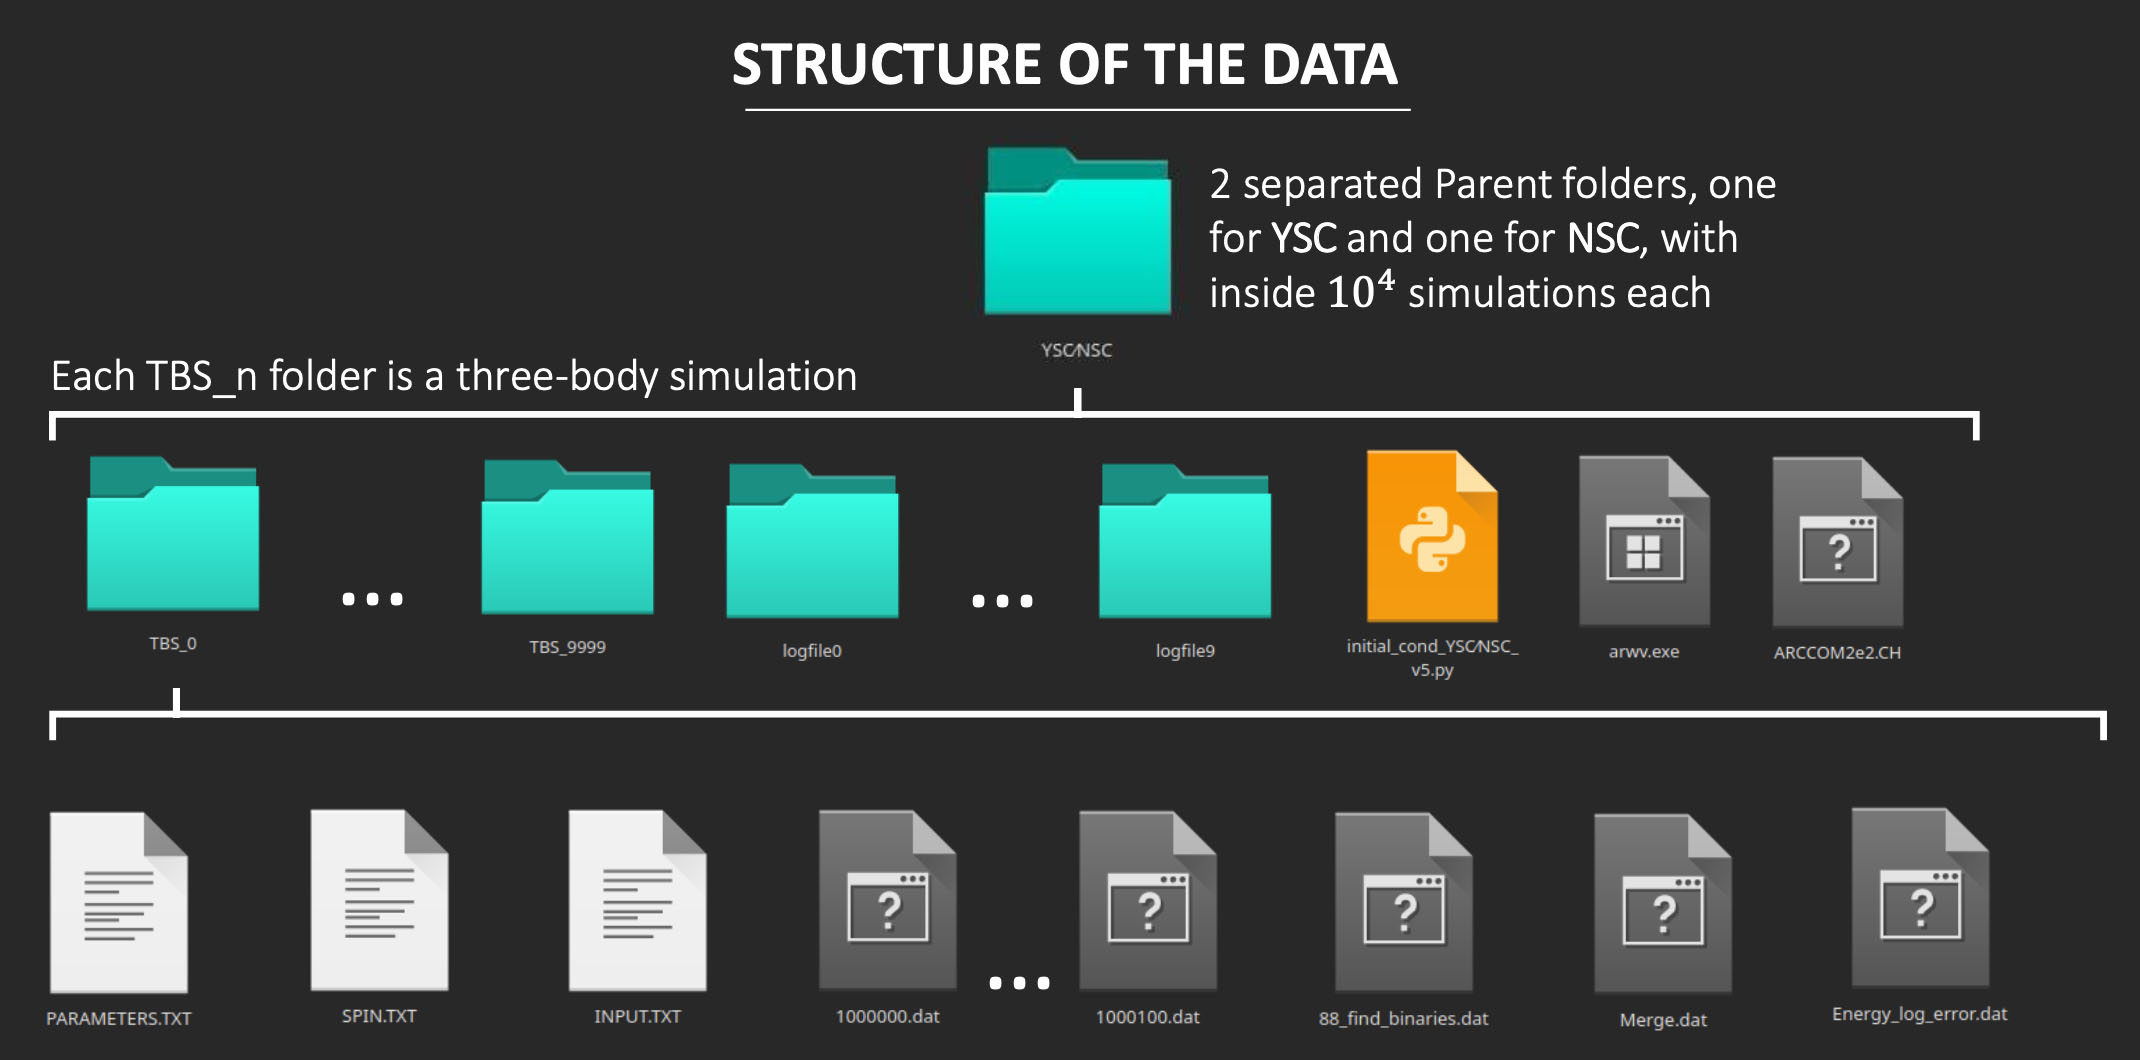

In [9]:
from IPython.display import Image
Image(filename='./Data/str_data.jpg', embed=True, width=900)

As indicated here above, both "YSC" and "NSC" folders contain $10000$ subfolders named from "TBS_0" to "TBS_9999", and each one of these represents a three-body simulation.

Again, each simulation contain 1000 files (named from 1000000.dat to 1001000.dat) in which are indicated respectively: <br>
**masses**, **positions coordinates** and **velocities components** for each of the three blackholes, expressed in *N-body units*.
Each one of this 1000 files rappresent the evolution of the Three-body system after a time step of $\Delta t = 10^2 \, yr$, so the entire simulation correspond to a total $T_{max}=10^5 \, yr$ of time evolution. 
<br>

Another important file, present in almost all *TBS* folder, containing usefull informations is the "*88_find_binaries.dat*", in which are indicated the values of the **semi-major axis $a$**  and the **eccentricity $e$** of the binary sistem for each time step of the simulation.
<br>

Since the simulations have been previously done, it's important to say that for both the star cluster dataset (NSC and YSC) the initial parameters of each simulation were set such that always the $1^{st} \, BH$ and the $2^{nd}\, BH$ form a binary while the $3^{rd} BH $ is not originally binded.
<br>

In case of a merge event happened during the simulation, from that specific time on, one of the rows of the simulation's output became full of zeros; also another output file is produced on the simulation folder, called "Merge.dat" in which are present some usefull informations *( it will be discuss in detail later on the following notebook)*.
<br>

In order to study these simulation's outputs and to investigate some statistics, we proceed to estrapolate some usefull information from the datasets.

## MANIPULATION OF DATA TO CREATE USEFULL OUTPUT FILES

In [1]:
# importing the libraries
import os
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Create a file with the last X-points for each simulation

In [2]:
def create_file_last_X_points_of_sim (folder_cluster, N, X, verbose=False):
    '''
    INPUT:
        folder_cluster : string of the cluster from which upload the data, YSC or NSC 
                      N: number of simulation to pick from each folder_cluster, from TBS_0 to TBS_N
                      X: number of last points to be collected from each simulation folder "TBS_"
                verbose: if True, print out message if encounter errors in finding some file
    
    OUTPUT:
        An output file is produced on the subdirectory "Data" by adding the last X points 
            of simulation for each TBS_ folder in a given NSC or YSC folder, for N simulation.
    
    '''
    
    !mkdir Data
    
    names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz'] # column names of the dataframe
    m = np.zeros((N,3))
    pos1 = np.zeros((10*N, 3))
    pos2 = np.zeros((10*N, 3))
    pos3 = np.zeros((10*N, 3))
    vel1 = np.zeros((10*N, 3))
    vel2 = np.zeros((10*N, 3))
    vel3 = np.zeros((10*N, 3))
    
    if X==1:
        destination_folder = "Data/"+ folder_cluster +'_N'+ str(N) + "_endsim.dat"
    else:
        destination_folder = "Data/"+ folder_cluster +'_N'+ str(N) + "_last{}_from_end.dat".format(X)
    folder_cluster = str(folder_cluster) + "_t100/"
    
    with open( destination_folder, "w" ) as file_out:
            writer = csv.writer(file_out, delimiter= ',')
            writer.writerow(["# For each 3 lines is rappresented the last file.dat for each simulation"])
            
            last_dat = 1001000
            tmp=0
            
            # create a file reading from the folder from TBS_0 to TBS_N  (e.g. N= 10000 correspond to the entire simulations)
            for i in range(N):
                for prev_dat in range(last_dat ,0,-1):
                    input_file = folder_cluster + 'TBS_' + str(i) + '/' + str(prev_dat ) +'.dat'

                    if os.path.isfile(input_file) == True : # check if the file exist
                        tmp = prev_dat
                        if verbose:
                            print(i,") OK!   TBS_" + str(i) + '/' + str(prev_dat)+ '.dat EXIST!')
                        break

                    else:
                        if verbose:
                            print("Error: 'TBS_" + str(i) + '/' + str(prev_dat)+ ".dat' NOT FOUND\t Trying with the previous\n" )
                
                # append to the file the last X point of simulation
                for b in range(X):
                    if (b==(X-1)):
                        if verbose:
                            print("Writing %d simulation for TBS_"%X + str(i)+'\n')
                    input_file = folder_cluster + 'TBS_' + str(i) + '/' + str(tmp - b) + '.dat'
                    df = pd.read_csv( input_file , sep="\s+", header=None, names=names)

                    for j in range(3):
                        writer.writerow(df.loc[j].values)

        

#### Only 1 last point

In [3]:
#Creating the file with only the last point of simulation for each simulation (from TBS_0 to TBS_10000) 
#for both NSC and YSC
N=10000

create_file_last_X_points_of_sim("YSC",N, X=1)
create_file_last_X_points_of_sim("NSC",N, X=1)


mkdir: Data: File exists
mkdir: Data: File exists


#### 10 last points

In [4]:
#Creating the file with the last 10 points of simulation for each simulation (from TBS_0 to TBS_10000) 
#for both NSC and YSC
N=10000

create_file_last_X_points_of_sim("YSC",N, X=10)
create_file_last_X_points_of_sim("NSC",N, X=10)

mkdir: Data: File exists
mkdir: Data: File exists


### Create a file with first/last semimajor axis ($a$) and eccentricity ($e$) values for each simulation

In [5]:
def create_file_semi_maj_axis_head_tail (folder_cluster, N, where, num):
    
        '''
    INPUT:
        folder_cluster : string of the cluster from which upload the data, YSC or NSC 
                      N: number of simulation to pick from each folder_cluster, from TBS_0 to TBS_N
                  where: "tail" or "head", collecting the values from the bottom of top of the file "88_find_binaries.dat"
                    num: number of rows to be collected from each file "88_find_binaries.dat" 
    
    OUTPUT:
        An output file is produced on the subdirectory "Data" by adding "num" rows 
            of simulation of "88_find_binaries.dat" for each TBS_ folder in a given 
            NSC or YSC folder, for N simulation.
    
    '''
    
    !mkdir Data
    
    destination_folder = "Data/"+ str(folder_cluster) + "_semi_major_axis_"+where+".dat"

    folder_cluster = str(folder_cluster) + "_t100/"
    
    with open( destination_folder, "w" ) as file_out:
        writer = csv.writer(file_out, delimiter= ',')        
        writer.writerow(["A","e", "simulation"])
        
        for i in range(N):
            
            input_file = folder_cluster + 'TBS_' + str(i) + '/88_find_binaries.dat' 
            
            if os.path.isfile(input_file) == True :

                df = pd.read_csv( input_file , sep="\s+", header=None)
                if where == 'head':
                    writer.writerow( [df.head(num).loc[:,5].values[0], df.head(num).loc[:,7].values[0], i] )
                else:
                    writer.writerow( [df.tail(num).loc[:,5].values[0], df.tail(num).loc[:,7].values[0], i] )
            else: 
                print("\nError: Missing file --> " + input_file)
                writer.writerow([9999,9999,i])  # a specific value to be filtered out when importing the file

In [6]:
#Creating the 2 files with the last and first point of "88_find_binaries.dat" for each 
#simulation (from TBS_0 to TBS_10000)  for both NSC and YSC
N=10000
create_file_semi_maj_axis_head_tail("YSC",N,"head", 1)
create_file_semi_maj_axis_head_tail("YSC",N,"tail", 1)
create_file_semi_maj_axis_head_tail("NSC",N,"head", 1)
create_file_semi_maj_axis_head_tail("NSC",N,"tail", 1)


mkdir: Data: File exists

Error: Missing file --> YSC_t100/TBS_9926/88_find_binaries.dat
mkdir: Data: File exists

Error: Missing file --> YSC_t100/TBS_9926/88_find_binaries.dat
mkdir: Data: File exists

Error: Missing file --> NSC_t100/TBS_53/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_97/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_117/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_159/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_165/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_222/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_270/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_298/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_307/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_374/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_508/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_524/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_802/8


Error: Missing file --> NSC_t100/TBS_6081/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6109/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6110/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6131/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6144/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6159/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6181/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6190/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6219/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6221/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6232/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6389/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6392/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6409/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_6412/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_64


Error: Missing file --> NSC_t100/TBS_2050/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2203/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2224/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2253/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2391/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2502/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2523/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2561/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2600/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2675/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2899/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2912/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2960/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_2977/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_3012/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_30


Error: Missing file --> NSC_t100/TBS_7798/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_7809/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_7822/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_7908/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_7944/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8099/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8137/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8167/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8178/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8221/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8294/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8315/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8323/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8395/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_8445/88_find_binaries.dat

Error: Missing file --> NSC_t100/TBS_84

In [7]:
# an example of one simulation in which there is NOT the "88_find_binaries.dat"

df1 = pd.read_csv("Data/YSC_semi_major_axis_tail.dat", sep=",", header=0) # importing a file saved before
df2 = pd.read_csv("Data/NSC_semi_major_axis_tail.dat", sep=",", header=0) # importing a file saved before
print("Number of simulations without '88_find_binaries.dat':\n")
print("YSC: ",len(df1[df1.A == 9999]),"\n")
print("NSC: ",len(df2[df2.A == 9999]),"\n")


#FILTERING OUT rows that have a specific value (manually setup creating the file) corresponding to 
#those simulations that not have the file "88_find_binaries.dat"
df1[df1.A == 9999]

Number of simulations without '88_find_binaries.dat':

YSC:  1 

NSC:  216 



,A,e,simulation
9926,9999.0,9999.0,9926


## Create dataframe with the last point of simulation and choose the type of event accordingly to its binding energy $E_{bind}$

In [8]:
N=10000

names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz'] # column names of the dataframe

#importing the file created by the function above "create_file_last_X_points_of_sim" for NSC
data_import_NSC = pd.read_csv("Data/NSC_N" + str(N) + "_endsim.dat", sep=",", header=0, names=names)

data_import_NSC['simulation'] = [(i//3) for i in range(len(data_import_NSC))]
data_import_NSC['event'] = '' # adding a empty column "event" to be filled later


#importing the file created by the function above "create_file_last_X_points_of_sim" for YSC
data_import_YSC = pd.read_csv("Data/YSC_N"+ str(N) + "_endsim.dat", sep=",", header=0, names=names)

data_import_YSC['simulation'] = [(i//3) for i in range(len(data_import_YSC))]
data_import_YSC['event'] = '' # adding a empty column "event" to be filled later

In [9]:
data_NSC = data_import_NSC.copy()
data_NSC_2 = data_import_NSC.copy() # A second copy ( just for security reason )

data_YSC = data_import_YSC.copy()
data_YSC_2 = data_import_YSC.copy() # A second copy ( just for security reason )


### Function to convert from N-Body units to Physical units


Since the data originally are in $N$-$body$ units so that $G=1$, its necessary to convert them back to physical units.

It's what has been done, remembering that:

 $$L_{code} = L_{physical} /  L_{scale} $$
 $$M_{code} = M_{physical} /  M_{scale} $$
 $$T_{code} = T_{physical} /  T_{scale} $$

where:

$L_{scale}= 1 \, pc$ 

$M_{scale}= 1 \, M_{\bigodot}$

$T_{scale}= \sqrt{(L_{scale})^3 \, / \, (G \cdot M_{scale}  } \, \, yr$

In the last formula $G$ must be express in $pc, \, yr, \, M_{\bigodot}$ units.

In [10]:
# rescale the data from N-body UNITS to Physical UNITS

def rescaling_physical (data):
    G_pym = 6.67408e-11             # in m^3 * kg^-1 * s^-2
    M_scale =  1.988e30             # in Kg (solar Mass --> 1.988 * 10^30 Kg)
    L_scale = 3.08567758130573e16    # in m (1 pc --> 3.08567758130573 * 10^16 m)
    T_scale = np.sqrt(L_scale**3 / (G_pym * M_scale))

    data['m'] = data['m'] * M_scale
    data['x'] = data['x'] * L_scale
    data['y'] = data['y'] * L_scale
    data['z'] = data['z'] * L_scale
    data['vx'] = data['vx'] * (L_scale / T_scale)
    data['vy'] = data['vy'] * (L_scale / T_scale)
    data['vz'] = data['vz'] * (L_scale / T_scale)
    
    return(data)

In [11]:
data_phy_NSC = rescaling_physical (data_NSC.copy()) # converting the data from N-body units to physical units
data_nb_NSC = data_NSC.copy()  

data_phy_YSC = rescaling_physical (data_YSC.copy()) # converting the data from N-body units to physical units
data_nb_YSC = data_YSC.copy()  


# First rows of the entire dataframe of NSC data
print("\n\t\t\tNUCLEAR STAR CLUSTER - DATASET \n")
data_phy_NSC.head(9)  # DATA IN PHYSICAL UNITS



			NUCLEAR STAR CLUSTER - DATASET 



,m,x,y,z,vx,vy,vz,simulation,event
0,7.890195e+31,5.942404e+16,1.079995e+16,2.988083e+16,91052.636506,228771.439696,33320.519081,0,
1,5.259947e+31,5.942400e+16,1.079995e+16,2.988083e+16,-89516.901540,-334614.990552,-26315.402074,0,
2,1.099600e+31,-7.106533e+17,-1.291569e+17,-3.573456e+17,-225144.513104,-40918.642740,-113211.874718,0,
3,7.997938e+31,7.507173e+15,4.411329e+16,3.966306e+16,3606.176651,16234.034916,12709.209550,1,
4,7.819692e+31,7.434450e+15,4.414874e+16,3.967359e+16,1124.136366,11822.555497,12552.633618,1,
5,2.841042e+31,-4.159637e+16,-2.457003e+17,-2.208549e+17,-13245.978610,-78241.564864,-70328.147453,1,
6,1.133926e+32,-2.160735e+16,-2.355496e+16,-2.281402e+16,-22020.550479,-7994.490383,-3185.296382,2,
7,3.369434e+31,-2.160797e+16,-2.355702e+16,-2.281430e+16,44202.372198,-5696.016719,-20854.608632,2,
8,2.242598e+31,1.417187e+17,1.544948e+17,1.496324e+17,44929.940452,48980.668032,47439.225617,2,


In [12]:
# First rows of the entire dataframe of YSC data
print("\n\t\t\tYOUNG STAR CLUSTER - DATASET \n")
data_phy_YSC.head(9)


			YOUNG STAR CLUSTER - DATASET 



,m,x,y,z,vx,vy,vz,simulation,event
0,9.995663e+31,3.493244e+15,1.061028e+15,6.967651e+14,-101.924793,4787.076887,6251.618256,0,
1,8.435143e+31,3.476133e+15,1.062604e+15,7.033028e+14,2605.057165,-4915.871387,-6910.771111,0,
2,1.574954e+31,-4.078784e+16,-1.242506e+16,-8.188868e+15,-13305.293332,-4053.408508,-2664.033413,0,
3,8.470033e+31,-6.115676e+14,-2.145452e+15,3.775702e+15,15810.957873,5281.419763,1802.176093,1,
4,5.966502e+31,-6.141322e+14,-2.143431e+15,3.775722e+15,-22917.067343,-9150.094548,350.623599,1,
5,7.288414e+30,1.213463e+16,4.247952e+16,-7.478743e+16,3862.845765,13528.678726,-23813.805590,1,
6,7.438752e+31,3.484184e+14,1.854050e+15,2.940506e+15,796.665410,116.514648,-256.510109,2,
7,6.897831e+31,-9.235618e+14,2.111687e+15,2.940506e+15,-810.890406,-486.812876,-256.508833,2,
8,8.488455e+30,4.451663e+15,-3.340758e+16,-4.966370e+16,-392.075904,2934.843907,4332.318917,2,


### Selecting the event type

Computing the internal energy of each couple of binaries at the last point of each simulation, is possible to detect the type of the event the simulation represents.

Moreover, knowing that the binding energy is $$E_{bind} = -E_{int} = - \left( \dfrac{1}{2} \mu v^2 - \dfrac{G m_1 m_2}{r} \right) $$

where $\mu$ is the reduced mass of the binary system, while $v$ and $r$ are, respectively, the relative velocity and the relative position of the two masses, we could discriminate the type of event as follow:

$$ \quad \text{FLYBY}           \rightarrow E_{bind\_0-1}<0, \quad E_{bind\_1-2}>0, \quad E_{bind\_2-0}<0 $$

$$ \quad \text{EXCHANGE 1 - 3}  \rightarrow E_{bind\_0-1}>0, \quad E_{bind\_1-2}<0, \quad E_{bind\_2-0}<0 $$

$$ \quad \text{EXCHANGE 2 - 3}  \rightarrow E_{bind\_0-1}>0, \quad E_{bind\_1-2}>0, \quad E_{bind\_2-0}<0 $$

$$ \quad \text{IONIZATION}      \rightarrow E_{bind\_0-1}>0, \quad E_{bind\_1-2}>0, \quad E_{bind\_2-0}<0 $$

where the subscript $ 0, 1, 2 $ refer to the $1^{st} BH $, $2^{nd} BH $, $3^{rd} BH $.

In [13]:
# Function to select the event computing the binding energies between the BHs.
# Very slow and not vectorized computation ( using for loops)

# An alternative fast computation has been done in the second notebook ("2-Classification")
def select_event (dataframe, n, NBODY_units = False):
    
        '''
    INPUT:
        dataframe : the input dataframe of NSC o YSC data imported here above
                 n: an integer to be used later to go through all the dataframe each 3 lines
       NBODY_units: Use different value of "G" depending on the dataframe in input 
                   (if in N-body units --> G=1;   
                    if in physical units --> G= 6.67408e-11 [ m^3 * kg^-1 * s^-2] )
                   
    
    OUTPUT:
                  event: a string rappresented the type of event given the input (every 3 rows of dataframe)
        rel_temp['E_b']:  a dataframe compose by 3 rows that contain the binding energies from each couple of BHs.
                            (used later to fill the original dataframe)
    '''

    #Temp Dataframe for each event...in order I compute 2-1 , 3-2, 3-1
    
    df_temp = (dataframe[(3*n):(3*n+3)][['x','y','z' ,'vx','vy','vz']]).append(dataframe[(3*n):(3*n+1)][['x','y','z', 'vx','vy','vz']])
    rel_temp = pd.DataFrame.diff(df_temp, axis=0).dropna()
    rel_temp[2:] = rel_temp[2:] * (-1)

    rel_temp = rel_temp.rename(index={(3*n+1):'BH_2-1',(3*n+2):'BH_3-2', (3*n +0):'BH_3-1'})

    #Mass reduced
    m01 = dataframe['m'][0 + 3*n] * dataframe['m'][1 + 3*n]
    m12 = dataframe['m'][1 + 3*n] * dataframe['m'][2 + 3*n]
    m02 = dataframe['m'][0 + 3*n] * dataframe['m'][2 + 3*n]
    m_prod = np.array([m01, m12, m02])

    m01_r = m01 /(dataframe['m'][0 + 3*n] + dataframe['m'][1 + 3*n])
    m12_r = m12 /(dataframe['m'][1 + 3*n] + dataframe['m'][2 + 3*n])
    m02_r = m02 /(dataframe['m'][0 + 3*n] + dataframe['m'][2 + 3*n]) 
    m_red = np.array([m01_r, m12_r, m02_r])   # Vector of reduced mass

    rel_temp['mu'] = m_red


    #---- Internal Energy E_int ------
    if NBODY_units:
        G = 1                 # in N-body units
    else:
        G = 6.67408e-11       # in m^3 * kg^-1 * s^-2
    
    v_vec = np.sqrt( rel_temp['vx']**2 +  rel_temp['vy']**2 + rel_temp['vz']**2 ) # v_vec: module of relative velocity
    r_vec = np.sqrt( rel_temp['x']**2 +  rel_temp['y']**2 + rel_temp['z']**2 )    # r_vec: module of relative distance

    E_int = 1/2 * rel_temp['mu'] * ( v_vec **2) - G * m_prod / r_vec # Internal Energy: E_int

    rel_temp['E_b'] = E_int*(-1)  # Binding energy: E_b = - E_int
    
    
    
    # ---------defining the types of event ---------------
    
    events_type = {0:'flyby' , 1:'merge', 2:'change13', 3 :'change23', 4 :'ionization'}
    #events_type = {'flyby':0 ,'merge':1,'change':2, 'ionization': 3}  # 0 --> fly-by,
    #                                                                 # 1 --> merge,
    #                                                                 # 2 --> change 13
    #                                                                 # 2 --> change 23
    #                                                                 # 4 --> ionization
  
    event_found = False
        
    # ---------- Checking Merge event ---------------
    
    tt_merge = (dataframe[(3*n):(3*n+3)].m.values == 0) # Table of true for merge
    event='Not_found'

    for i in range(3):
        if (tt_merge[i] == True):
            event = events_type[1] #merge event
            event_found = True
            break
        
    # ---------- Choosing the type of event accordingly to the binding energies E_b ---------------
    
    if (event_found == False):
        
        bind_12, bind_23, bind_13 = rel_temp['E_b'] > 0
        

        if ( (bind_12 == True) and (bind_23 == False) and (bind_13 == False) ): #flyby event
            event = events_type[0] 
            event_found = True

        elif ( (bind_12 == False) and (bind_23 == True) and (bind_13 == False) ): #change 1 3 event
            event = events_type[2] 
            event_found = True

        elif ( (bind_12 == False) and (bind_23 == False) and (bind_13 == True) ): #change 2 3 event
            event = events_type[3] 
            event_found = True

        elif ( (bind_12 == False) and (bind_23 == False) and (bind_13 == False) ): #ionization event
            event = events_type[4] 
            event_found = True
            
    return(event,rel_temp['E_b'])

In [14]:
#ordered colomn's names for the dataframe 
ordered_df_names = ['m','x','y','z','vx','vy','vz','Eb','simulation','event']

In [15]:
# Here is filled the dataframe with the event type ( for NSC, using physical units)

list_Eb_phy_NSC = [] # List that will contain all Binding Energy dataframe for each simulation

for n in range(N):
    this_event, df_Eb_phy = select_event(data_phy_NSC, n, NBODY_units= False)
    list_Eb_phy_NSC.append(df_Eb_phy)

    data_phy_NSC.loc[3*n:3*n+3,'event'] = this_event
    
Eb = np.array(list_Eb_phy_NSC).reshape(3*len(list_Eb_phy_NSC)).T 
data_phy_NSC['Eb'] = Eb

data_phy_NSC= data_phy_NSC[ordered_df_names]

In [16]:
# Here is filled the dataframe with the event type ( for NSC, using N-body units)

list_Eb_nb_NSC = [] # List that will contain all Binding Energy dataframe for each simulation

for n in range(N):
    this_event, df_Eb_nb = select_event(data_nb_NSC, n, NBODY_units= True)
    list_Eb_nb_NSC.append(df_Eb_nb)
    
    data_nb_NSC.loc[3*n:3*n+3,'event'] = this_event

Eb = np.array(list_Eb_nb_NSC).reshape(3*len(list_Eb_nb_NSC)).T 
data_nb_NSC['Eb'] = Eb

data_nb_NSC= data_nb_NSC[ordered_df_names]

In [17]:
# Here is filled the dataframe with the event type ( for YSC, using physical units)

list_Eb_phy_YSC = [] # List that will contain all Binding Energy dataframe for each simulation

for n in range(N):
    this_event, df_Eb_phy = select_event(data_phy_YSC, n, NBODY_units= False)
    list_Eb_phy_YSC.append(df_Eb_phy)
    
    data_phy_YSC.loc[3*n:3*n+3,'event'] = this_event

Eb = np.array(list_Eb_phy_YSC).reshape(3*len(list_Eb_phy_YSC)).T 
data_phy_YSC['Eb'] = Eb

data_phy_YSC= data_phy_YSC[ordered_df_names]    

In [18]:
# Here is filled the dataframe with the event type ( for YSC, using N-body units)

list_Eb_nb_YSC = [] # List that will contain all Binding Energy dataframe for each simulation

for n in range(N):
    this_event, df_Eb_nb = select_event(data_nb_YSC, n, NBODY_units= True)
    list_Eb_nb_YSC.append(df_Eb_nb)
    
    data_nb_YSC.loc[3*n:3*n+3,'event'] = this_event
    
Eb = np.array(list_Eb_nb_YSC).reshape(3*len(list_Eb_nb_YSC)).T 
data_nb_YSC['Eb'] = Eb

data_nb_YSC= data_nb_YSC[ordered_df_names]

In [19]:
# An example:
# The YSC dataframe complete with the value of Binding Energy and the corresponding type of event 
# (each 3 rows correspond  to the final point of the simulation)
print("\n\t\t\tYOUNG STAR CLUSTER - DATASET \n")
data_nb_YSC


			YOUNG STAR CLUSTER - DATASET 



,m,x,y,z,vx,vy,vz,Eb,simulation,event
0,50.279995,0.113208,0.034386,0.022581,-1.554359,73.003181,95.337515,2.845552e+06,0,flyby
1,42.430295,0.112654,0.034437,0.022792,39.727262,-74.967304,-105.389632,-2.108643e+05,0,flyby
2,7.922303,-1.321844,-0.402669,-0.265383,-202.906440,-61.814698,-40.626653,-2.639319e+05,0,flyby
3,42.605799,-0.019820,-0.069529,0.122362,241.117960,80.541936,27.483283,8.583611e+06,1,flyby
4,30.012587,-0.019903,-0.069464,0.122363,-349.486512,-139.539435,5.347029,-6.896483e+05,1,flyby
...,...,...,...,...,...,...,...,...,...,...
29995,3.098252,-5.563291,7.298985,-13.133733,-830.689000,1089.850835,-1961.070821,-9.281354e+06,9998,change23
29996,63.138950,0.160927,-0.211130,0.380030,128.713258,-73.831570,41.613869,1.139045e+07,9998,change23
29997,39.670667,0.069257,0.330360,0.923332,371.029933,-362.176070,-76.691799,8.190442e+07,9999,flyby
29998,32.617436,0.069270,0.330361,0.923332,-428.369489,549.682340,398.450981,-1.261396e+07,9999,flyby


### Creating an output file with last point and also the event type for each simulation 

In [20]:
def fileoutput_from_dataframe (dataframe, output_filename):
    '''
    INPUT:
        dataframe: complete dataframe of NSC or YSC to be saved for further use.
        output_filename: the name of the output file (.dat)
    '''
    
    output_filename = "Data/" + output_filename
        
    col_names = np.array( dataframe.columns, dtype = str)
    
    
    with open( (output_filename + ".dat") , "w" ) as file_out:
        writer = csv.writer(file_out, delimiter= ',')
        writer.writerow(col_names)

        for i in range(len(dataframe)):
            writer.writerow(dataframe.loc[i].values)

    print("Done!\t Created file:", (output_filename + ".dat"))    

In [21]:
fileoutput_from_dataframe(data_phy_NSC, "NSC_N10000_ok_phy")
fileoutput_from_dataframe(data_phy_YSC, "YSC_N10000_ok_phy")

fileoutput_from_dataframe(data_nb_NSC, "NSC_N10000_ok_nb")
fileoutput_from_dataframe(data_nb_YSC, "YSC_N10000_ok_nb")

Done!	 Created file: Data/NSC_N10000_ok_phy.dat
Done!	 Created file: Data/YSC_N10000_ok_phy.dat
Done!	 Created file: Data/NSC_N10000_ok_nb.dat
Done!	 Created file: Data/YSC_N10000_ok_nb.dat
